In [1]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


[*********************100%***********************]  2 of 2 completed


0:00:00.433575


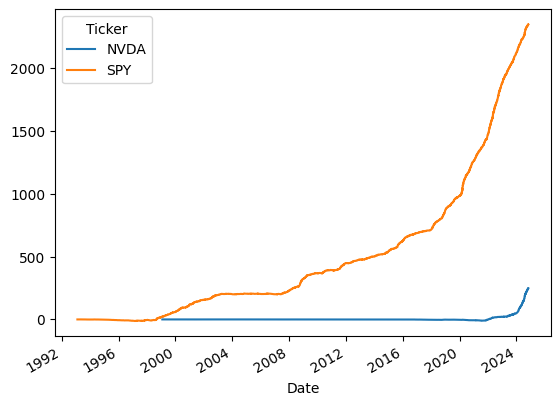

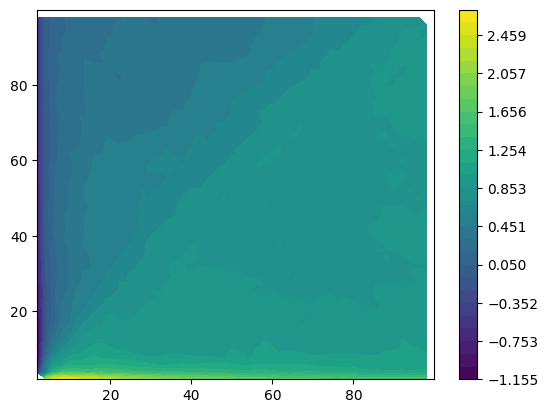

In [6]:
import yfinance as yf
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib 
import pylab as plt
from matplotlib import cm 
from scipy.interpolate import griddata

stk = yf.download('SPY,NVDA')

adj = stk['Adj Close']

start = dt.datetime.now()
side = (np.sign((adj.rolling(2).mean() - adj.rolling(6).mean())-1)/2)
(adj.diff()*side.shift(-1)).cumsum().plot()
print(dt.datetime.now() - start)


def vecttest(adj, a, b):
    side = (np.sign((adj.rolling(a).mean() - adj.rolling(b).mean())+1)/2)
    return (adj.pct_change()*side.shift(-1))

def sweep(adj):
    metric = {}

    for a in range(2,100,2):
        for b in range(2,100,2):
            if a != b: 
                rets = vecttest(adj,a,b).mean(axis=1)
                sharpe = (np.mean(rets)/np.std(rets)) *np.sqrt(252)
                metric[(a,b)] = sharpe
    return metric
metric = sweep(adj)

X = [k[0] for k in list(metric.keys())] #Finding the keys in dic and plotting them with returns and a,b 
Y = [k[1] for k in list(metric.keys())]
Z = list(metric.values())

XX,YY = np.meshgrid(np.arange(2,100,0.1),np.arange(2,100,0.1))

ZZ = griddata(np.array([X,Y]).T,Z,np.array([XX,YY]).T)

fig= plt.figure()
level= np.linspace(np.nanmin(Z),np.nanmax(Z),30)
ax= fig.add_subplot()
surf=ax.contourf(XX,YY,ZZ,level)
plt.colorbar(surf)

max_key = max(metric, key=metric.get)
max_value = metric[max_key]

S = 5000

metric1 = sweep(adj.iloc[:S])
metric2 = sweep(adj.iloc[S:])

In [9]:
max_key

(2, 8)